In [1]:
#Autor Víctor Viera B.
#necesita el Archivo casas2.csv
#Tratamiento de datos
import pandas as pd
#para graficar datos
import seaborn as sns
#para graficar datos
import matplotlib.pyplot as plt
#para grafica

In [3]:
datos = pd.read_csv("/content/Position_Salaries.csv",sep=',')

In [45]:
datos

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


Se observa la correlación de las variables

In [6]:
#se mira la correlación
datos=datos.iloc[:,1:3]
datos

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [7]:
datos.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [9]:
#graficamos para observar el comportamiento de los salarios
nivelX=datos.filter(items=['Level'])
salarioY=datos.filter(items=['Salary'])

<Axes: >

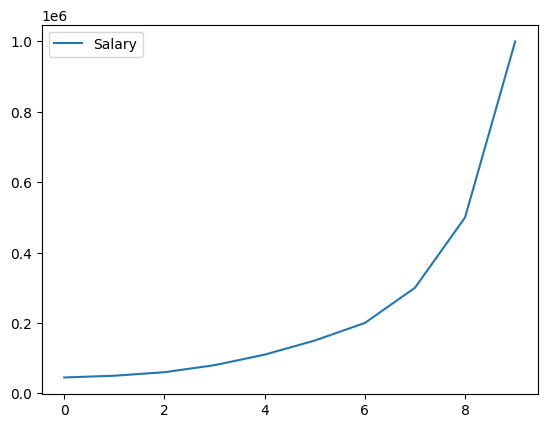

In [11]:
salarioY.plot()

In [13]:
#para trabajar con un modelo de tipo polinomial
#para trabajar las potencias de las X, grado del polinomio
from sklearn.preprocessing import PolynomialFeatures
#regresión linenal
from sklearn.linear_model import LinearRegression


In [15]:
#se importa la parte de partición de la data
from sklearn.model_selection import train_test_split
X_trainS, X_testS = train_test_split(nivelX, test_size=0.20, random_state=42)
Y_trainS, Y_testS = train_test_split(salarioY, test_size=0.20, random_state=42)

In [16]:
X_trainS

,Level
5,6
0,1
7,8
2,3
9,10
4,5
3,4
6,7


In [17]:
Y_trainS

,Salary
5,150000
0,45000
7,300000
2,60000
9,1000000
4,110000
3,80000
6,200000


In [24]:
lr_poly = LinearRegression()
#se establece el grado del polinomio,no coloce lo de las bias
poly_reg = PolynomialFeatures(degree = 2)
#se establecen las variables al grado del polinomio que se necesita
X_poly = poly_reg.fit_transform(X_trainS)
#se transforman los datos para que los coeficientes queden elevados al grado del polinomio
y_poly = poly_reg.fit_transform(salarioY)


In [25]:
#se puede ver las variables transformadas
X_poly

array([[  1.,   6.,  36.],
       [  1.,   1.,   1.],
       [  1.,   8.,  64.],
       [  1.,   3.,   9.],
       [  1.,  10., 100.],
       [  1.,   5.,  25.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.]])

In [26]:
#se ejecuta el modelo
lr_poly.fit(X_poly, Y_trainS)

LinearRegression()

In [27]:
#valores de predicción
Y_pred=lr_poly.predict(poly_reg.fit_transform(nivelX))
Y_pred


array([[114155.94968909],
       [ 38027.48728095],
       [  2903.12323347],
       [  8782.85754664],
       [ 55666.69022046],
       [143554.62125495],
       [272446.65065008],
       [442342.77840588],
       [653243.00452233],
       [905147.32899943]])

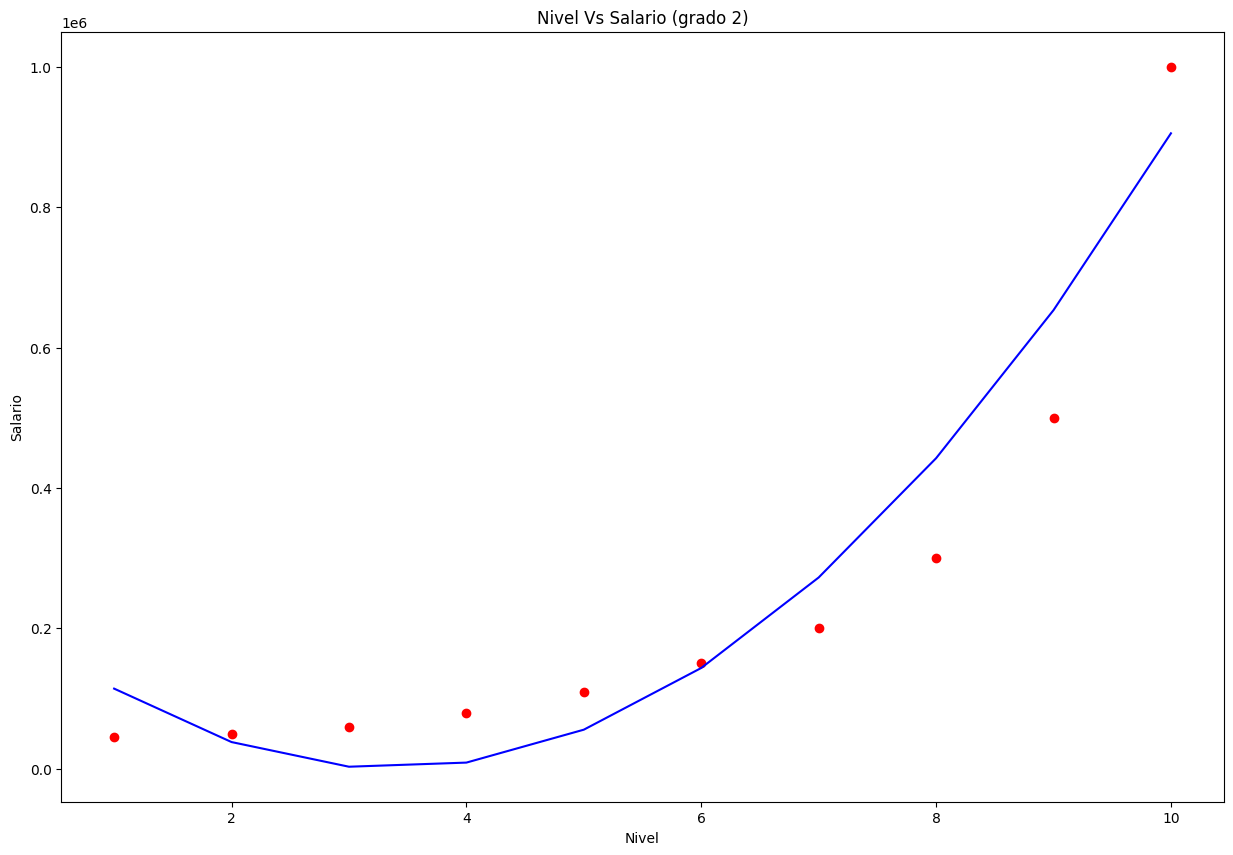

In [28]:
# Visualising the Polynomial Regression results
plt.figure(figsize=(15, 10))
plt.scatter(nivelX, salarioY, color = 'red')
plt.plot(nivelX, Y_pred, color = 'blue')
plt.title('Nivel Vs Salario (grado 2)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

In [30]:
from sklearn import metrics
print(metrics.r2_score(salarioY,Y_pred))

0.907959542414969


In [50]:
#creamos el modelo con un polinomio de grado 3
lr_poly = LinearRegression()
poly_reg = PolynomialFeatures(degree = 3)
#fijamos las variables con el modelo de grado 3
X_poly = poly_reg.fit_transform(X_trainS)
y_poly = poly_reg.fit_transform(Y_trainS)
#accionamos el modelo
lr_poly.fit(X_poly, Y_trainS)


LinearRegression()

In [51]:
Y_pred3=lr_poly.predict(poly_reg.fit_transform(nivelX))
Y_pred3

array([[ 33134.07003414],
       [ 84934.89129171],
       [ 95296.49476981],
       [ 87774.11365133],
       [ 85922.98111918],
       [113298.33035623],
       [193455.39454538],
       [349949.40686953],
       [606335.60051157],
       [986169.2086544 ]])

In [52]:
#observamos las características
X_poly

array([[   1.,    6.,   36.,  216.],
       [   1.,    1.,    1.,    1.],
       [   1.,    8.,   64.,  512.],
       [   1.,    3.,    9.,   27.],
       [   1.,   10.,  100., 1000.],
       [   1.,    5.,   25.,  125.],
       [   1.,    4.,   16.,   64.],
       [   1.,    7.,   49.,  343.]])

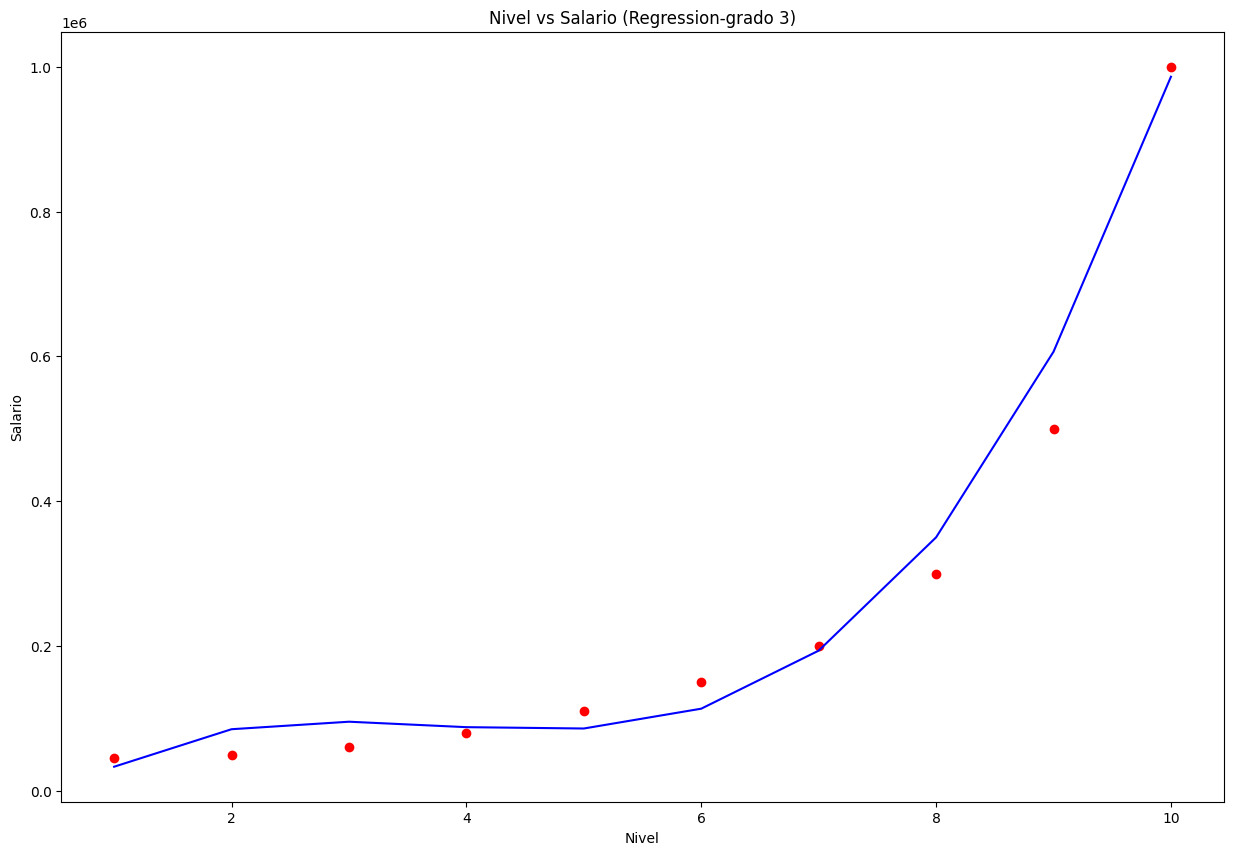

In [53]:
# Visualizamos el modelo vs los datos
plt.figure(figsize=(15, 10))
plt.scatter(nivelX, salarioY, color = 'red')
plt.plot(nivelX, Y_pred3, color = 'blue')
plt.title('Nivel vs Salario (Regression-grado 3)')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

In [47]:
#medimos
print(metrics.r2_score(salarioY,Y_pred3))

0.9993752853396525


In [36]:
lr_poly.intercept_

array([-83661.2021858])

In [37]:
lr_poly.coef_

array([[     0.        , 157144.24209541, -44274.84207263,
          3925.87219715]])